In [2]:
import matplotlib.pyplot as plt
import numpy as np
#import pymc3 as pm
from IPython.display import Markdown as md
#import arviz as az
from scipy import stats
from scipy.special import expit as logistic
import seaborn as sns
from matplotlib import rcParams
#%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
#az.style.use("arviz-darkgrid")
#az.rcParams["stats.hdi_prob"] = 0.89
#az.rcParams["stats.ic_scale"] = "deviance"
#az.rcParams["stats.information_criterion"] = "waic"


In [3]:
from nilearn import datasets

#dataset_ho = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-1mm", symmetric_split=True)
dataset_ho = datasets.fetch_atlas_harvard_oxford(atlas_name = "cort-maxprob-thr25-1mm", symmetric_split = True)
dataset_ho_sc = datasets.fetch_atlas_harvard_oxford(atlas_name = "sub-maxprob-thr25-1mm", symmetric_split = True)

#dataset_ju = datasets.fetch_atlas_juelich("maxprob-thr0-1mm")
#dataset_de  = datasets.fetch_atlas_destrieux_2009()

atlas_ho_filename = dataset_ho.filename
#atlas_ju_filename = dataset_ju.filename

print(f"Atlas ROIs are located at: {atlas_ho_filename}")
#print(f"Atlas ROIs are located at: {atlas_ju_filename}")

Atlas ROIs are located at: /home/jovyan/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cortl-maxprob-thr25-1mm.nii.gz


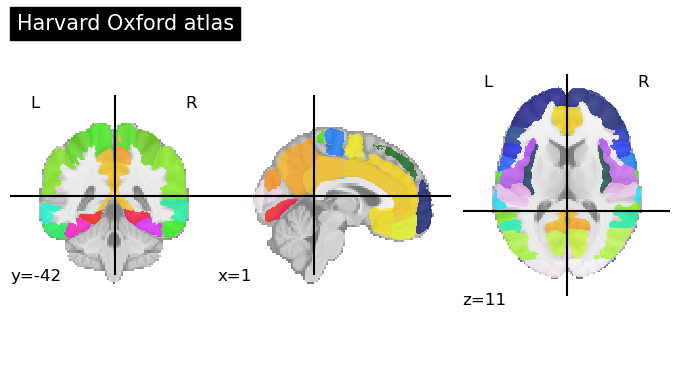

In [4]:
from nilearn import plotting

plotting.plot_roi(atlas_ho_filename, title="Harvard Oxford atlas")

# plotting the results - ALL

In [7]:
import numpy as np
import pandas as pd
from nilearn import image, plotting
from nilearn.input_data import NiftiLabelsMasker


#Dres = pd.read_csv('/analysis/Argyelan/nipype_playground/ECTman/Dore/Dore-results.csv')
#Dres = pd.read_csv('/analysis/Argyelan/nipype_playground/ECTman/Dore/Dore_res_v2.csv')
Dres = pd.read_csv('/analysis/Argyelan/nipype_playground/ECTman/Dore/Dore_results_1224.csv', sep=';', encoding='latin-1')

Dres.columns#

Index(['Unnamed: 0', 'Region of interest', 'Total sample (N=71), t(SE)',
       'Total sample (N=71), p', 'RUL patients (n=24), t(SE)',
       'RUL patients (n=24), p', 'Switchers (n=29), t(SE)',
       'Switchers (n=29), p', 'BL patients (n=18), t(SE)',
       'BL patients (n=18), p'],
      dtype='object')

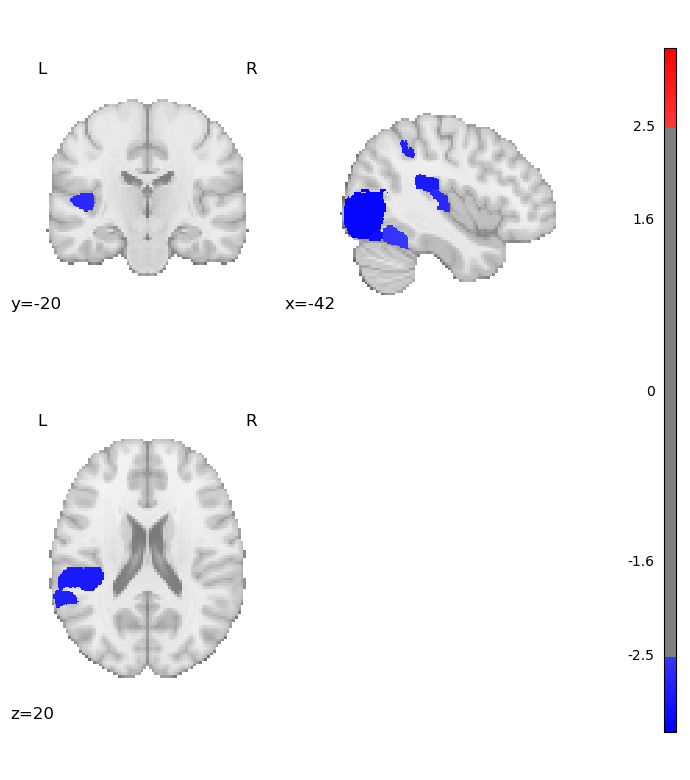

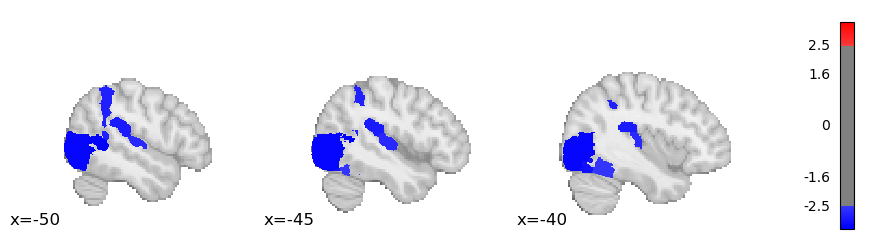

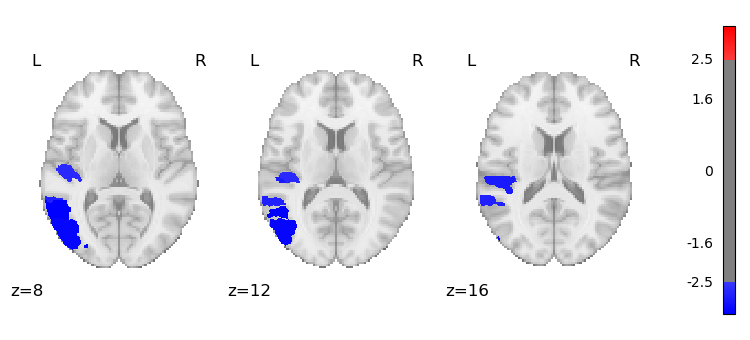

In [59]:
values=[float(i.split()[0]) for i in Dres[Dres.columns[2]]]
len(values)

roi_img_1=image.load_img(dataset_ho.filename)
roi_img_2=image.load_img(dataset_ho_sc.filename)

roimg3d_1 =  roi_img_1.get_fdata()
roimg2d_1 = roimg3d_1.reshape([1,np.prod(roimg3d_1.shape)])

roimg3d_2 =  roi_img_2.get_fdata()
roimg2d_2 = roimg3d_2.reshape([1,np.prod(roimg3d_2.shape)])

data=np.zeros([1, np.prod(roi_img_1.shape)])
               
data.shape

cor_corr=[s.replace(',','').replace('temporooccipital','temporo-occipital').replace(' (formerly Supplementary Motor Cortex)','').replace('Juxtapositional','Juxta-positional').replace('tal Opercular','tal Operculum').replace("'","").replace('(','').replace(')','').replace('Heschls','Heschls') for s in dataset_ho.labels]
sub_corr=[s.replace(',','').replace('temporooccipital','temporo-occipital').replace(' (formerly Supplementary Motor Cortex)','').replace('Juxtapositional','Juxta-positional').replace('tal Opercular','tal Operculum').replace("'","").replace('(','').replace(')','').replace('Brain-Stem','Brain Stem') for s in dataset_ho_sc.labels]


goto = np.where(~Dres['Region of interest'].isin(['Right Cerebral White Matter','Right Cerebral Cortex','Right Lateral Ventricle','Left Cerebral White Matter','Left Cerebral Cortex','Left Lateral Ventricle']))
#only go over the regions, not on the entire cortex
for i in goto[0]:
    ix = np.where(np.array(cor_corr)==Dres['Region of interest'].iloc[i])
    m=1
    if len(ix[0])==0:
        ix = np.where(np.array(sub_corr)==Dres['Region of interest'].iloc[i])
        m=2
    if (m==1):
        ind = np.where(roimg2d_1==ix[0])
        data[0,ind[1]] = values[i]
    if (m==2):
        ind = np.where(roimg2d_2==ix[0])
        data[0,ind[1]] = values[i]
    #print(ix[0])
    #print(Dres['Region of interest'].iloc[i])
new_img = image.new_img_like(roi_img_1, data.reshape(roi_img_1.shape))
plotting.plot_stat_map(new_img,  cut_coords=[-42,-20,20],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='tiled', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[-50,-45,-40],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='x', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[8,12,16],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='z', black_bg=False, draw_cross=False)

# plotting the results - RUL

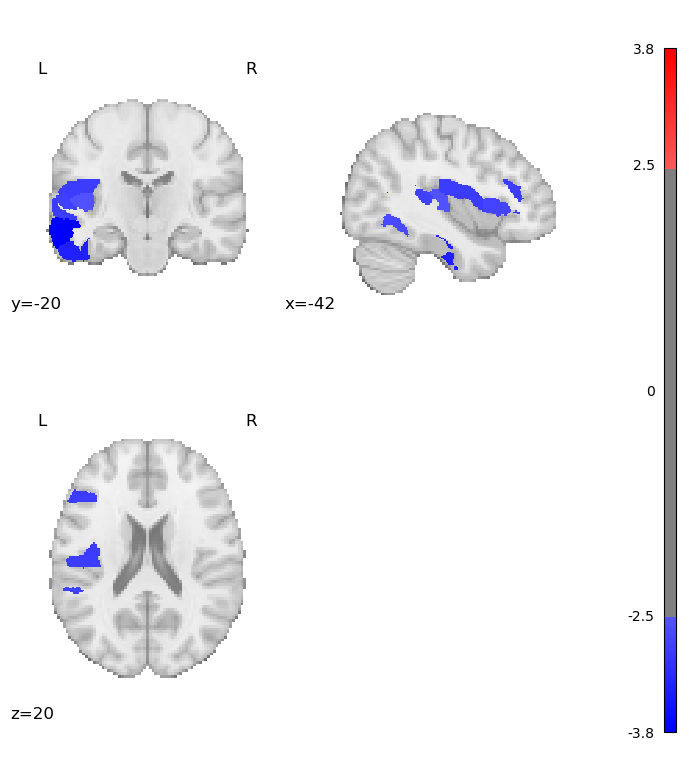

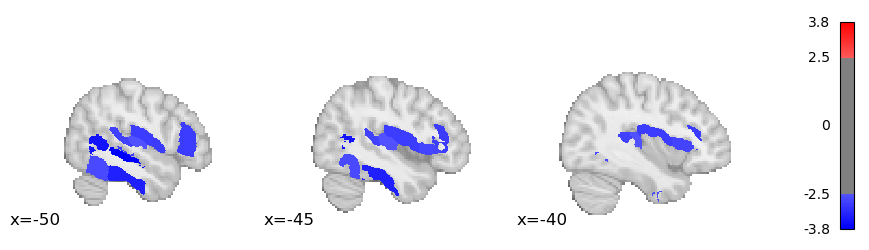

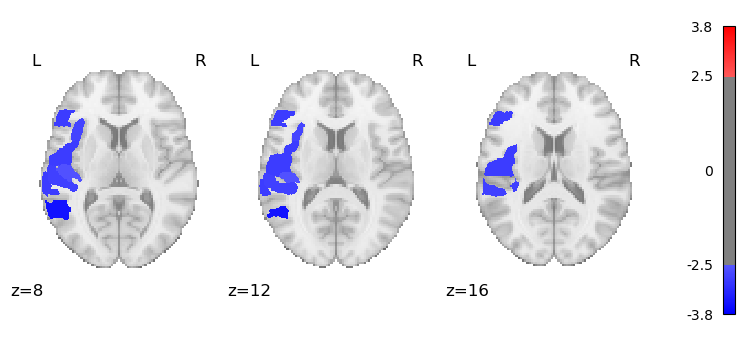

In [60]:
values=[float(i.split()[0]) for i in Dres[Dres.columns[4]]]
len(values)

roi_img_1=image.load_img(dataset_ho.filename)
roi_img_2=image.load_img(dataset_ho_sc.filename)

roimg3d_1 =  roi_img_1.get_fdata()
roimg2d_1 = roimg3d_1.reshape([1,np.prod(roimg3d_1.shape)])

roimg3d_2 =  roi_img_2.get_fdata()
roimg2d_2 = roimg3d_2.reshape([1,np.prod(roimg3d_2.shape)])

data=np.zeros([1, np.prod(roi_img_1.shape)])
               
data.shape

cor_corr=[s.replace(',','').replace('temporooccipital','temporo-occipital').replace(' (formerly Supplementary Motor Cortex)','').replace('Juxtapositional','Juxta-positional').replace('tal Opercular','tal Operculum').replace("'","").replace('(','').replace(')','').replace('Heschls','Heschls') for s in dataset_ho.labels]
sub_corr=[s.replace(',','').replace('temporooccipital','temporo-occipital').replace(' (formerly Supplementary Motor Cortex)','').replace('Juxtapositional','Juxta-positional').replace('tal Opercular','tal Operculum').replace("'","").replace('(','').replace(')','').replace('Brain-Stem','Brain Stem') for s in dataset_ho_sc.labels]


goto = np.where(~Dres['Region of interest'].isin(['Right Cerebral White Matter','Right Cerebral Cortex','Right Lateral Ventricle','Left Cerebral White Matter','Left Cerebral Cortex','Left Lateral Ventricle']))
#only go over the regions, not on the entire cortex
for i in goto[0]:
    ix = np.where(np.array(cor_corr)==Dres['Region of interest'].iloc[i])
    m=1
    if len(ix[0])==0:
        ix = np.where(np.array(sub_corr)==Dres['Region of interest'].iloc[i])
        m=2
    if (m==1):
        ind = np.where(roimg2d_1==ix[0])
        data[0,ind[1]] = values[i]
    if (m==2):
        ind = np.where(roimg2d_2==ix[0])
        data[0,ind[1]] = values[i]
    #print(ix[0])
    #print(Dres['Region of interest'].iloc[i])
new_img = image.new_img_like(roi_img_1, data.reshape(roi_img_1.shape))
plotting.plot_stat_map(new_img,  cut_coords=[-42,-20,20],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='tiled', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[-50,-45,-40],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='x', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[8,12,16],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='z', black_bg=False, draw_cross=False)


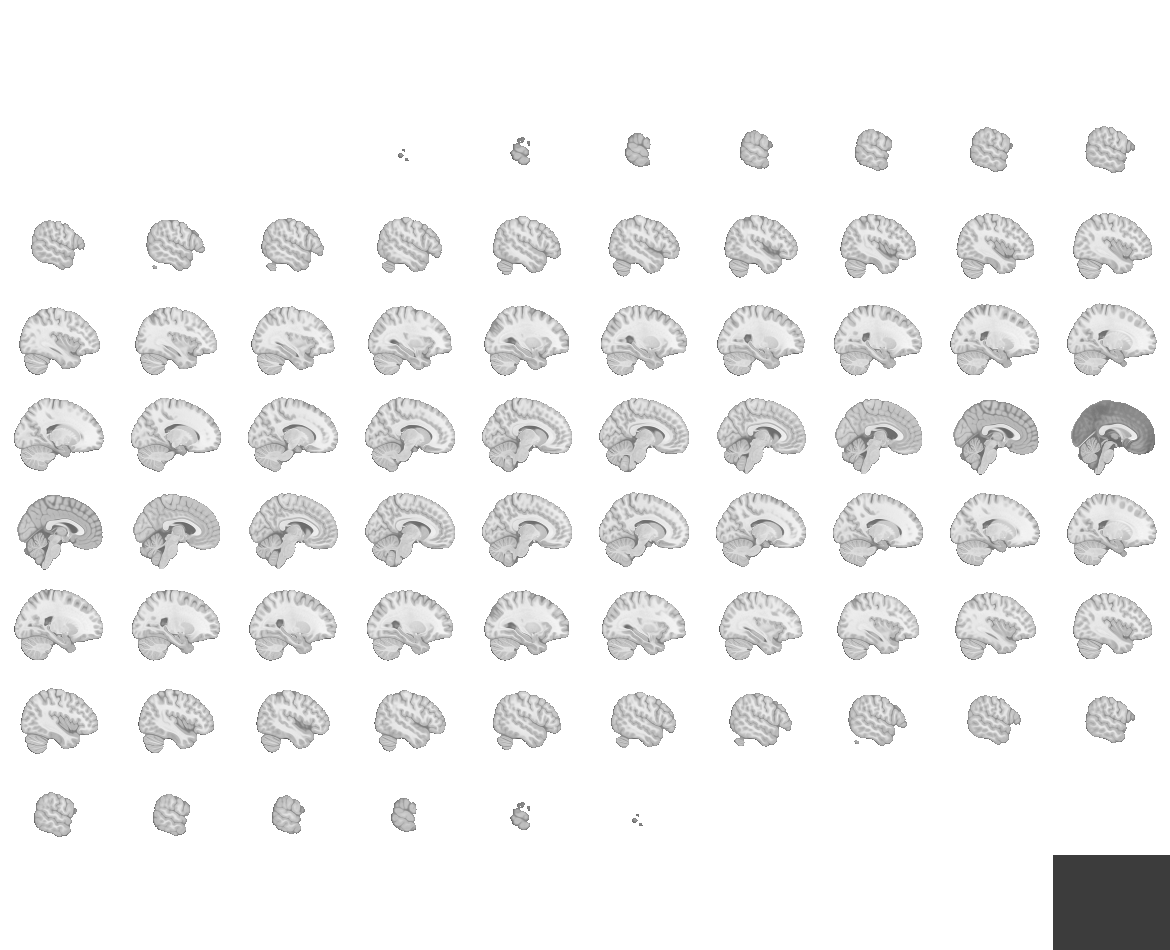
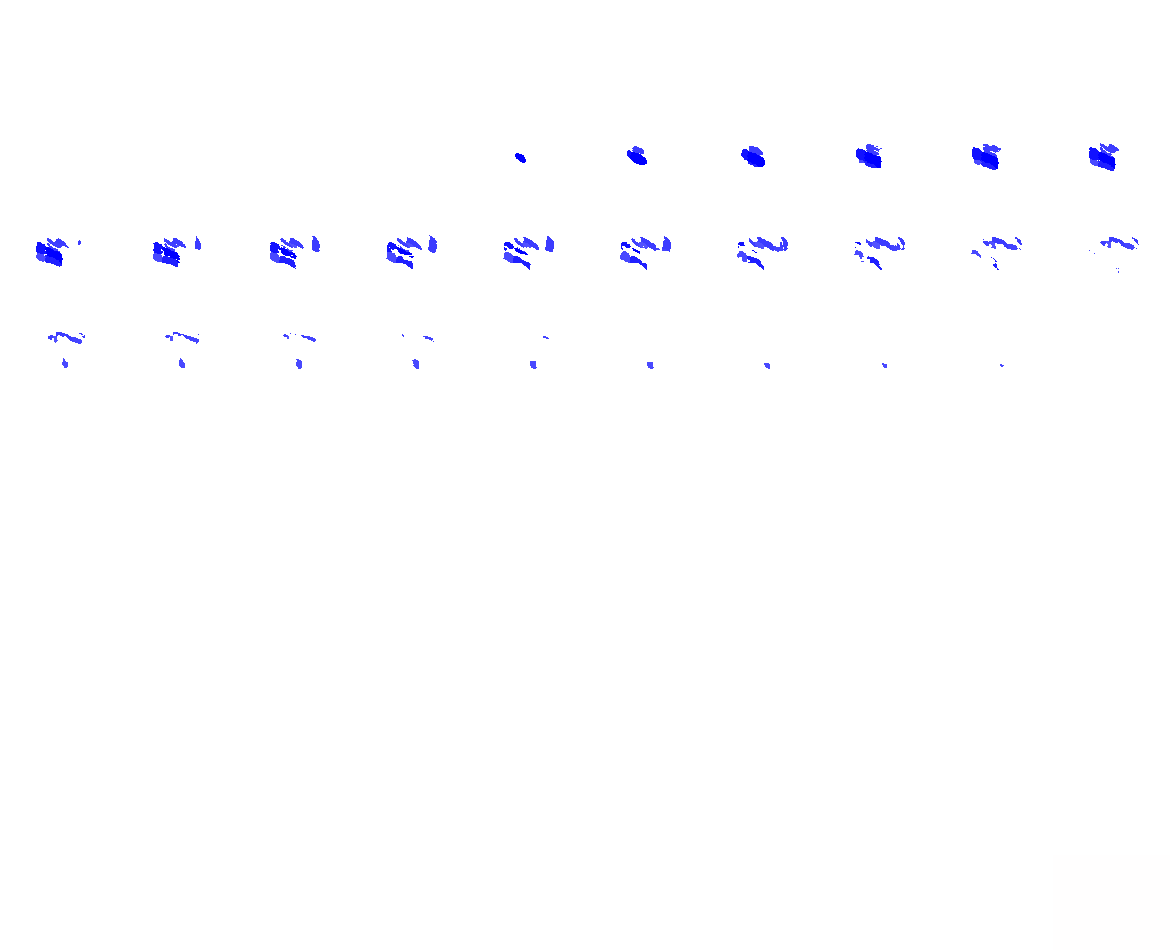

In [62]:
plotting.view_img(new_img,  cut_coords=[20,10,20],cmap=plt.cm.bwr,  threshold= 2.5, black_bg=False, draw_cross=False)

# plotting the results BL

/opt/conda/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


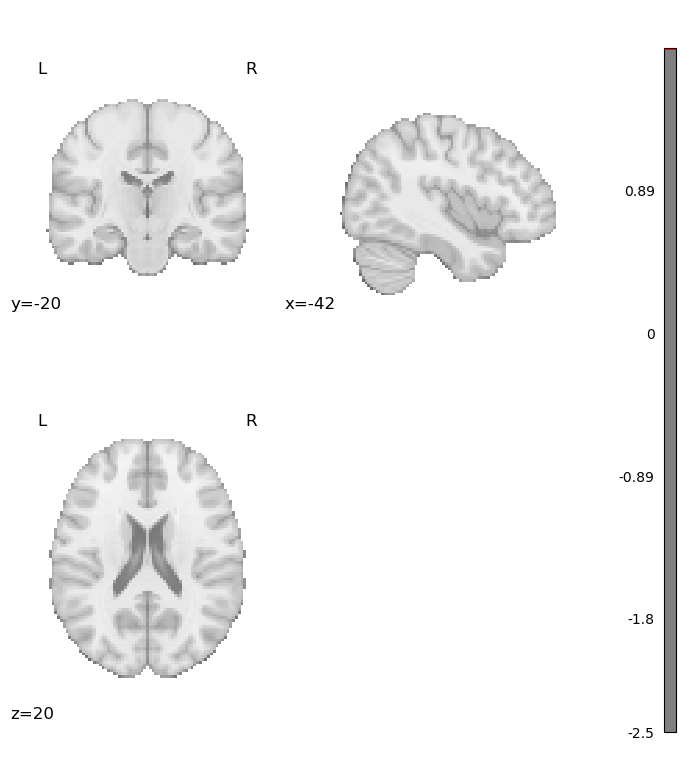

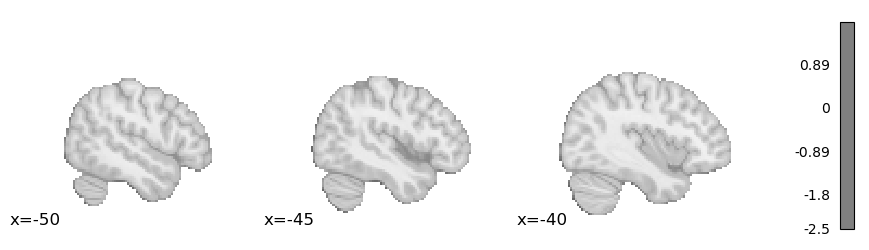

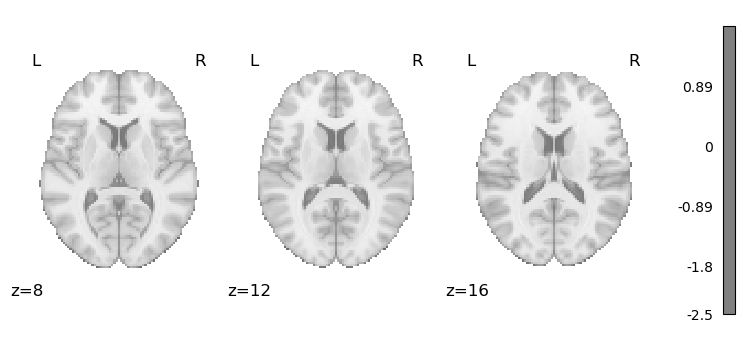

In [63]:
values=[float(i.split()[0]) for i in Dres[Dres.columns[8]]]
len(values)

roi_img_1=image.load_img(dataset_ho.filename)
roi_img_2=image.load_img(dataset_ho_sc.filename)

roimg3d_1 =  roi_img_1.get_fdata()
roimg2d_1 = roimg3d_1.reshape([1,np.prod(roimg3d_1.shape)])

roimg3d_2 =  roi_img_2.get_fdata()
roimg2d_2 = roimg3d_2.reshape([1,np.prod(roimg3d_2.shape)])

data=np.zeros([1, np.prod(roi_img_1.shape)])
               
data.shape

cor_corr=[s.replace(',','').replace('temporooccipital','temporo-occipital').replace(' (formerly Supplementary Motor Cortex)','').replace('Juxtapositional','Juxta-positional').replace('tal Opercular','tal Operculum').replace("'","").replace('(','').replace(')','').replace('Heschls','Heschls') for s in dataset_ho.labels]
sub_corr=[s.replace(',','').replace('temporooccipital','temporo-occipital').replace(' (formerly Supplementary Motor Cortex)','').replace('Juxtapositional','Juxta-positional').replace('tal Opercular','tal Operculum').replace("'","").replace('(','').replace(')','').replace('Brain-Stem','Brain Stem') for s in dataset_ho_sc.labels]


goto = np.where(~Dres['Region of interest'].isin(['Right Cerebral White Matter','Right Cerebral Cortex','Right Lateral Ventricle','Left Cerebral White Matter','Left Cerebral Cortex','Left Lateral Ventricle']))
#only go over the regions, not on the entire cortex
for i in goto[0]:
    ix = np.where(np.array(cor_corr)==Dres['Region of interest'].iloc[i])
    m=1
    if len(ix[0])==0:
        ix = np.where(np.array(sub_corr)==Dres['Region of interest'].iloc[i])
        m=2
    if (m==1):
        ind = np.where(roimg2d_1==ix[0])
        data[0,ind[1]] = values[i]
    if (m==2):
        ind = np.where(roimg2d_2==ix[0])
        data[0,ind[1]] = values[i]
    #print(ix[0])
    #print(Dres['Region of interest'].iloc[i])
new_img = image.new_img_like(roi_img_1, data.reshape(roi_img_1.shape))
plotting.plot_stat_map(new_img,  cut_coords=[-42,-20,20],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='tiled', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[-50,-45,-40],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='x', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[8,12,16],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='z', black_bg=False, draw_cross=False)

# plotting the results -  switchers

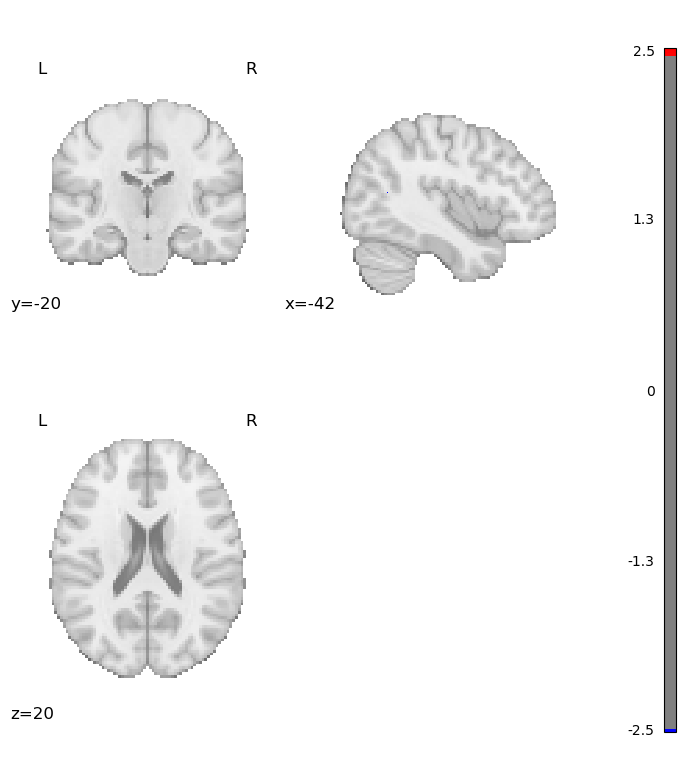

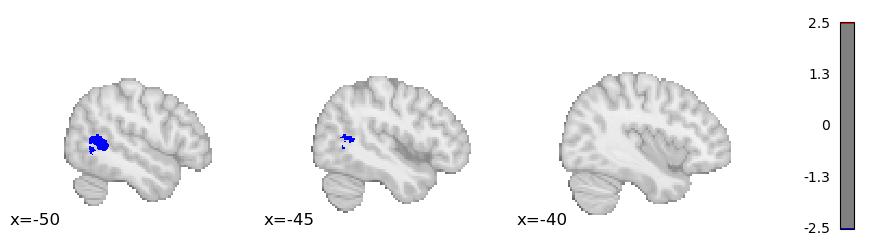

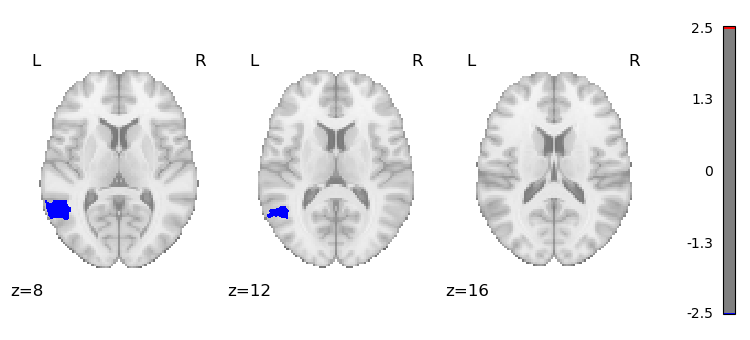

In [64]:
values=[float(i.split()[0]) for i in Dres[Dres.columns[6]]]
len(values)

roi_img_1=image.load_img(dataset_ho.filename)
roi_img_2=image.load_img(dataset_ho_sc.filename)

roimg3d_1 =  roi_img_1.get_fdata()
roimg2d_1 = roimg3d_1.reshape([1,np.prod(roimg3d_1.shape)])

roimg3d_2 =  roi_img_2.get_fdata()
roimg2d_2 = roimg3d_2.reshape([1,np.prod(roimg3d_2.shape)])

data=np.zeros([1, np.prod(roi_img_1.shape)])
               
data.shape

cor_corr=[s.replace(',','').replace('temporooccipital','temporo-occipital').replace(' (formerly Supplementary Motor Cortex)','').replace('Juxtapositional','Juxta-positional').replace('tal Opercular','tal Operculum').replace("'","").replace('(','').replace(')','').replace('Heschls','Heschls') for s in dataset_ho.labels]
sub_corr=[s.replace(',','').replace('temporooccipital','temporo-occipital').replace(' (formerly Supplementary Motor Cortex)','').replace('Juxtapositional','Juxta-positional').replace('tal Opercular','tal Operculum').replace("'","").replace('(','').replace(')','').replace('Brain-Stem','Brain Stem') for s in dataset_ho_sc.labels]


goto = np.where(~Dres['Region of interest'].isin(['Right Cerebral White Matter','Right Cerebral Cortex','Right Lateral Ventricle','Left Cerebral White Matter','Left Cerebral Cortex','Left Lateral Ventricle']))
#only go over the regions, not on the entire cortex
for i in goto[0]:
    ix = np.where(np.array(cor_corr)==Dres['Region of interest'].iloc[i])
    m=1
    if len(ix[0])==0:
        ix = np.where(np.array(sub_corr)==Dres['Region of interest'].iloc[i])
        m=2
    if (m==1):
        ind = np.where(roimg2d_1==ix[0])
        data[0,ind[1]] = values[i]
    if (m==2):
        ind = np.where(roimg2d_2==ix[0])
        data[0,ind[1]] = values[i]
    #print(ix[0])
    #print(Dres['Region of interest'].iloc[i])
new_img = image.new_img_like(roi_img_1, data.reshape(roi_img_1.shape))
plotting.plot_stat_map(new_img,  cut_coords=[-42,-20,20],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='tiled', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[-50,-45,-40],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='x', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[8,12,16],cmap=plt.cm.bwr,  threshold= 2.5, display_mode='z', black_bg=False, draw_cross=False)
